In [1]:
import stompy.model.delft.dflow_model as dfm
import numpy as np
import pandas as pd
import xarray as xr
from stompy.grid import multi_ugrid
import os
import six
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
six.moves.reload_module(dfm)

<module 'stompy.model.delft.dflow_model' from '/home/rustyh/src/stompy/stompy/model/delft/dflow_model.py'>

In [3]:
fig_dir="fig-scenarios-20220317"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [4]:
# Start with 2D runs
runs=pd.DataFrame(dict(run_dir=['data_2016_2d_asbuilt_impaired',
                                'data_2016_2d_asbuilt_impaired_scen1',
                                'data_2016_2d_asbuilt_impaired_scen2',
                                'data_2016_2d_asbuilt_impaired_scen3'],
                       name=['Base','Low','Medium','High']))


In [5]:
runs['model']=runs.run_dir.apply(lambda rd: dfm.DFlowModel.load(rd))

runs['his']=runs.model.apply(lambda mod: mod.his_dataset())

Some lines are degenerate
Some lines are degenerate
Some lines are degenerate
node_coordinates cross_section_geom_node_coordx cross_section_geom_node_coordy do not exist


Preliminary 2D plots:

First step is to verify that the scenarios are working as planned.
 - time series of waterlevel at key locations
 
Second step is to go through the analyses in the scope:
 - which can be handled in 2D
 - do any require more output than is currently configured?
 


In [6]:
stage_stations=[ ['thalweg_pesc_0000','Ocean'],
                 ['nck','Lagoon'],
                 ['pch_up','Culverts (N)'],
                 ['nmp','North Marsh Panne'],
                 ['npc','Ped. Bridge']]

In [7]:
def fig_waterlevel_timeseries(rec):
    fig,ax=plt.subplots(1,1,figsize=(7.5,4))

    his=rec['model'].his_dataset()
    
    for station,name in stage_stations:
        ax.plot(his.time,
                his.waterlevel.sel(stations=station),
                label=name)

    ax.legend(loc='upper left',bbox_to_anchor=[1.03,1])
    fig.subplots_adjust(right=0.72,left=0.1,top=0.98)
    ax.set_ylabel('Stage (m)')
    ax.text(0.03,0.97,rec['name'],transform=ax.transAxes,ha='left',va='top')
    fig.autofmt_xdate()
    return fig

<IPython.core.display.Javascript object>


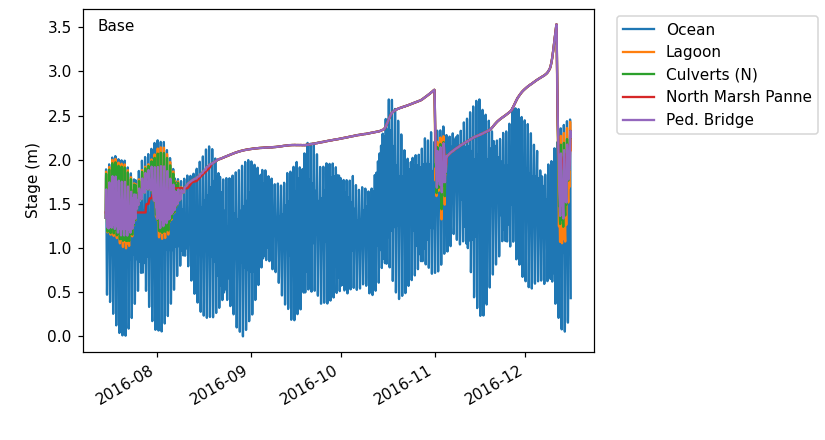

Some lines are degenerate


<IPython.core.display.Javascript object>


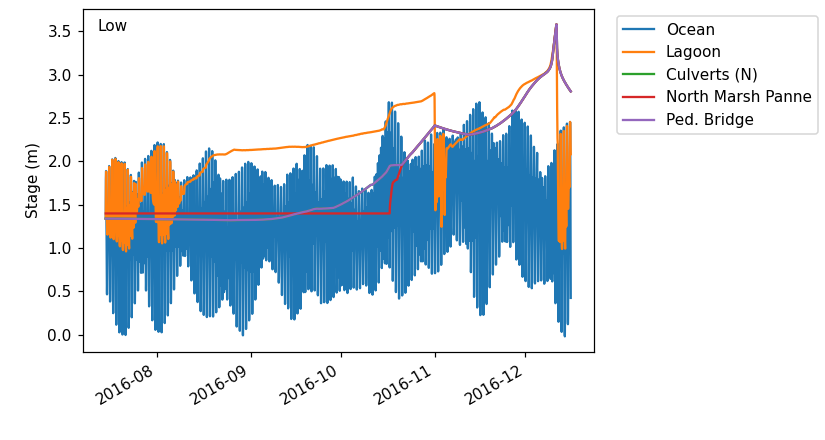

Some lines are degenerate


<IPython.core.display.Javascript object>


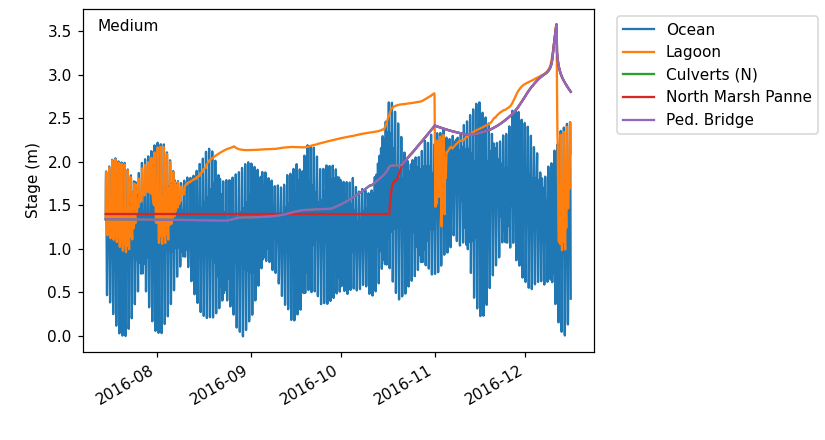

Some lines are degenerate


<IPython.core.display.Javascript object>


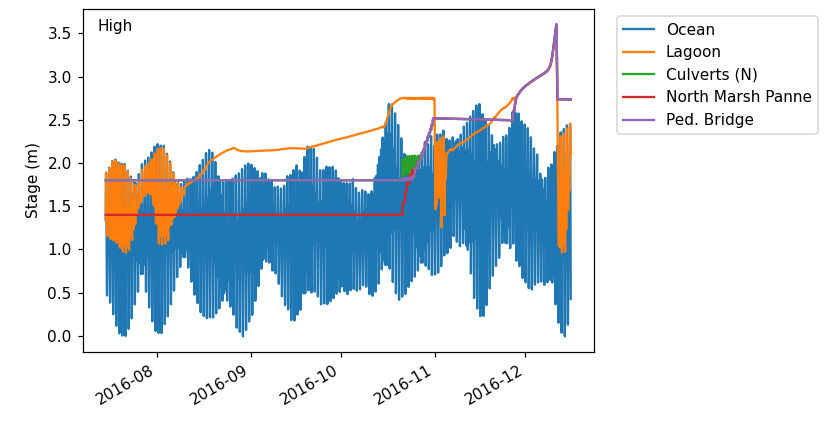

node_coordinates cross_section_geom_node_coordx cross_section_geom_node_coordy do not exist


In [8]:
for _,rec in runs.iterrows():
    fig=fig_waterlevel_timeseries(rec) 
    fig.savefig(os.path.join(fig_dir,f'stage-timeseries-2016-{rec.name}.png'),
                dpi=150)

Tidal Analysis
--

Bed stress

For bed stress, probably best to choose a day and re-run with half-hour output. Choose
2016-08-03 to 2016-08-05. Restarts are every 10 days, with one falling on 2016-08-04.

Tidal prism



In [9]:
# Start with 2D runs
tidal_runs=pd.DataFrame([
    dict(name='Base',run_dir='data_2016_2d_asbuilt_impaired/flowfmrtidal.mdu'),
    dict(name='Low', run_dir='data_2016_2d_asbuilt_impaired_scen1/flowfmrtidal.mdu'),
    dict(name='Medium',run_dir='data_2016_2d_asbuilt_impaired_scen2/flowfmrtidal.mdu'),
    dict(name='High',run_dir='data_2016_2d_asbuilt_impaired_scen3/flowfmrtidal.mdu')
])

In [10]:
#six.moves.reload_module(dfm)

In [11]:
tidal_runs['model']=tidal_runs.run_dir.apply(lambda rd: dfm.DFlowModel.load(rd))

<IPython.core.display.Javascript object>


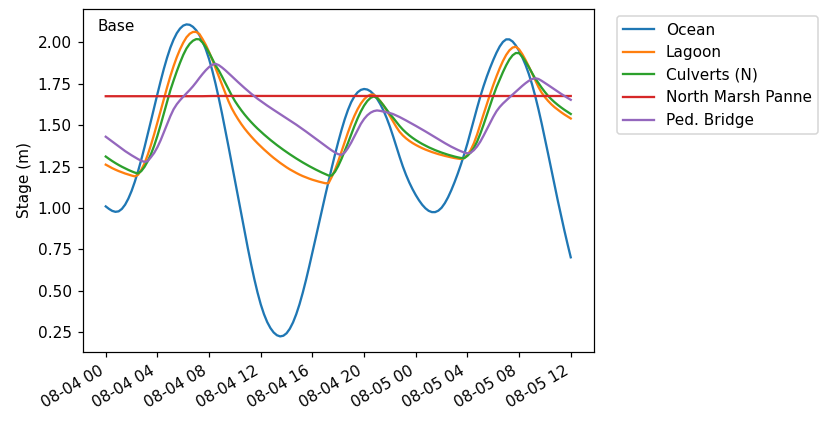

Some lines are degenerate


<IPython.core.display.Javascript object>


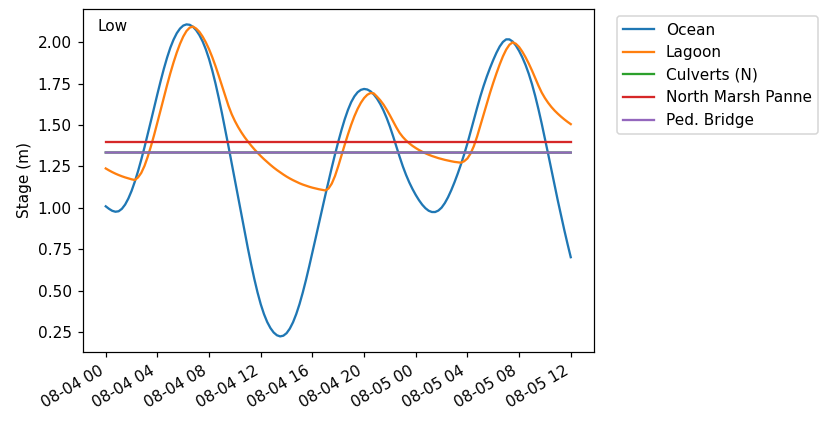

Some lines are degenerate


<IPython.core.display.Javascript object>


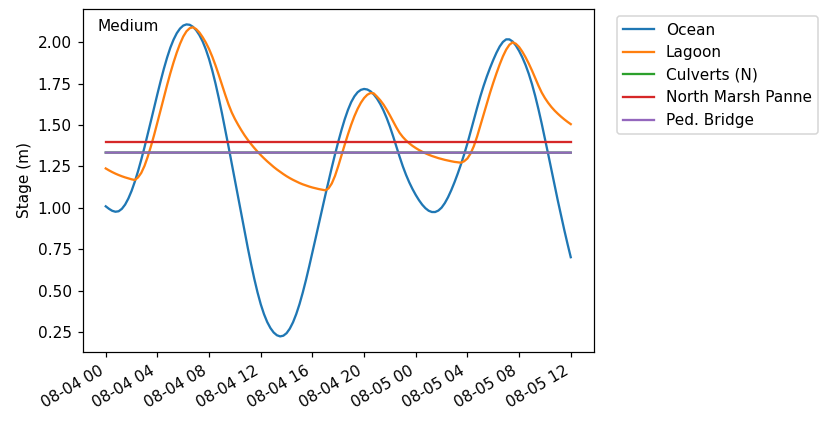

Some lines are degenerate


<IPython.core.display.Javascript object>


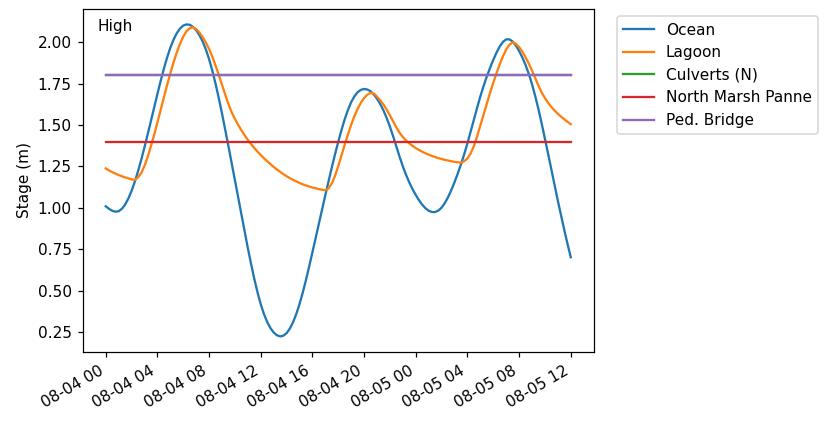

node_coordinates cross_section_geom_node_coordx cross_section_geom_node_coordy do not exist


In [12]:
for _,rec in tidal_runs.iterrows():
    fig=fig_waterlevel_timeseries(rec) 
    fig.savefig(os.path.join(fig_dir,f'tidal36h-stage-timeseries-2016-{rec.name}.png'),
                dpi=150)

In [13]:
# Choose an ebb period and a flood period
ebb_period=[np.datetime64('2016-08-04 06:30:00'),
            np.datetime64('2016-08-04 13:30:00')]
flood_period=[np.datetime64('2016-08-04 13:30:00'),
              np.datetime64('2016-08-04 20:00:00')]

In [14]:
for _,rec in tidal_runs.iterrows():
    ds=rec['model'].map_dataset()
    ebb_sel=(ebb_period[0]<=ds.time.values)&(ds.time.values<=ebb_period[1])
    flood_sel=(flood_period[0]<=ds.time.values)&(ds.time.values<=flood_period[1])
    break # DEV
    

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


<IPython.core.display.Javascript object>


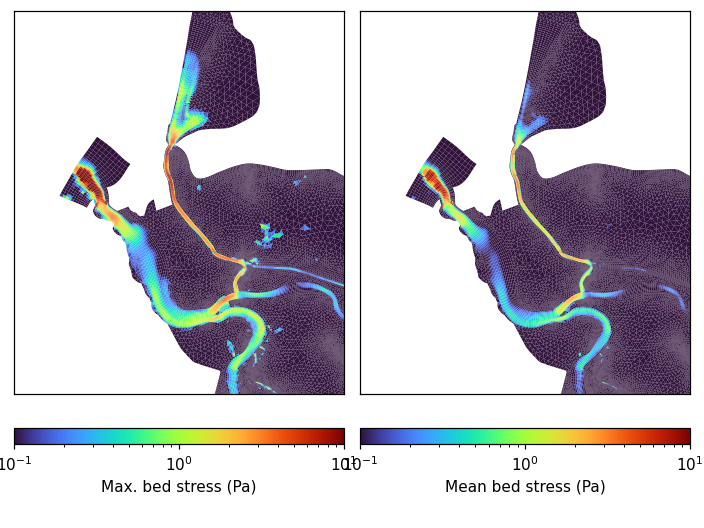

In [15]:
zoom=[552085, 552647.,4124191, 4125112]

from matplotlib import colors

for sel,period_name in [ (ebb_sel,'ebb'),
                         (flood_sel,'flood')]:
    tau=ds['mesh2d_taus'].isel(time=sel).values
    tau_max=np.nanmax(tau, axis=0)
    tau_mean=np.mean(tau,axis=0)
    fig,axs=plt.subplots(1,2)
    for ax,vals,label in zip(axs,
                              [tau_max,tau_mean],
                              ['Max. bed stress (Pa)','Mean bed stress (Pa)']):
        ax.set_adjustable('datalim')
        ax.xaxis.set_visible(0)
        ax.yaxis.set_visible(0)
        
        #ccoll=ds.grid.plot_cells(values=vals,cmap='turbo',ax=ax)
        #ccoll.set_clim([0,10])
        ccoll=ds.grid.plot_cells(values=vals.clip(0.1),cmap='turbo',ax=ax,norm=colors.LogNorm())
        ccoll.set_clim([0.1,10])
        
        plt.colorbar(ccoll,ax=ax,label=label,pad=0.07,orientation='horizontal')
        ax.axis(zoom)
    fig.subplots_adjust(left=0.02,right=0.98,top=0.98,bottom=0.05,wspace=0.05,hspace=0.05)
    break
    

In [48]:
plt.colorbar?

Diagnosing issues...
==


<IPython.core.display.Javascript object>


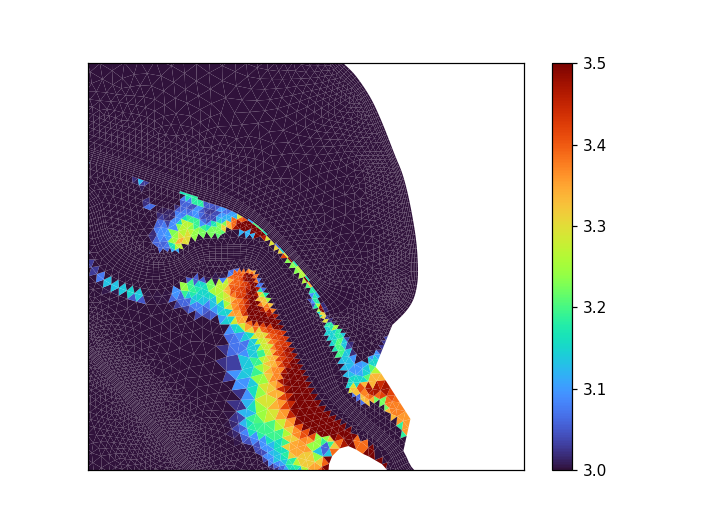

<IPython.core.display.Javascript object>


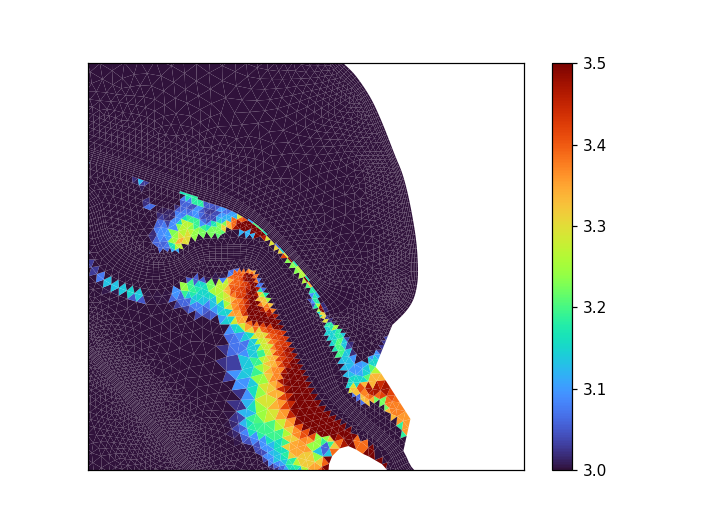

<IPython.core.display.Javascript object>


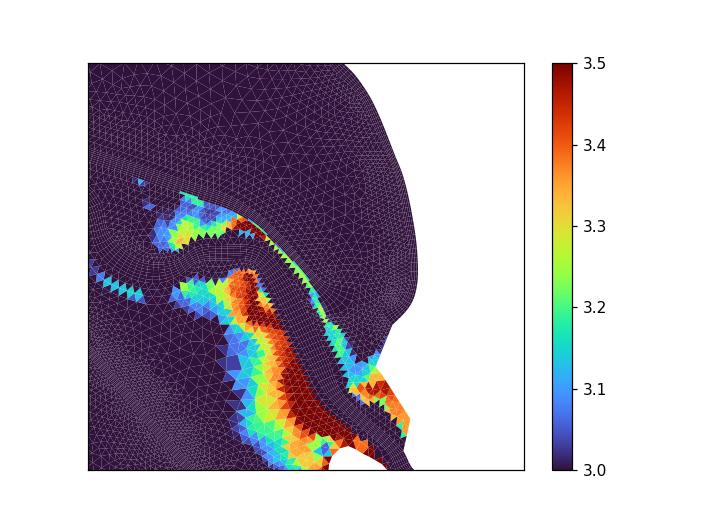

<IPython.core.display.Javascript object>


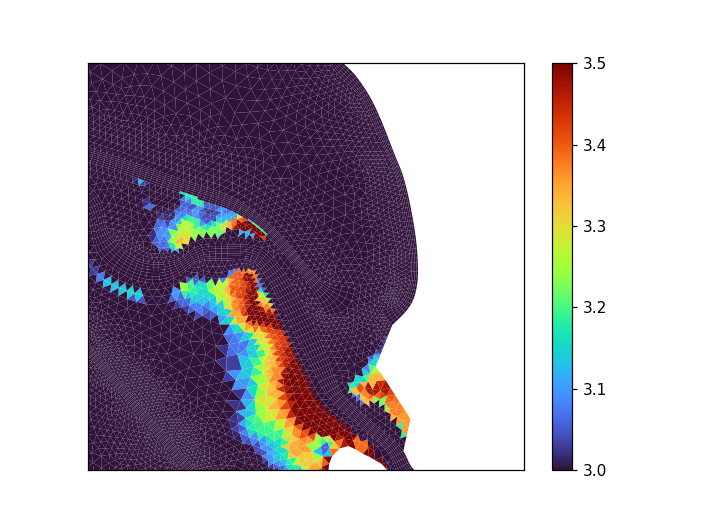

In [19]:
zoom=(552884.239654878, 553379.5380276634, 4124024.3290092396, 4124485.6754774386)

for i in range(len(runs)):
    fig,ax=plt.subplots()
    ax.set_adjustable('datalim')
    mu=runs['mu'].values[i]
    #ccoll=mu.grid.plot_cells(values=mu['mesh2d_ucmag'].isel(time=t_idx),
    #                         cmap='turbo')
    #ccoll.set_clim([0,2])

    #ccoll=mu.grid.plot_cells(values=mu['mesh2d_waterdepth'].isel(time=t_idx),
    #                         cmap='turbo')
    #ccoll.set_clim([0,3])
    
    ccoll=mu.grid.plot_cells(values=mu['mesh2d_flowelem_bl'].values,
                             cmap='turbo')
    ccoll.set_clim([3.0,3.5])
    
    #ccoll=mu.grid.plot_cells(values=mu['mesh2d_s1'].isel(time=t_idx),
    #                         cmap='turbo')
    #ccoll.set_clim([2,3.5])

    #ax.text(0.02,0.9,mu.time.values[t_idx],transform=ax.transAxes)
    ax.xaxis.set_visible(0)
    ax.yaxis.set_visible(0)
    plt.colorbar(ccoll)
    ax.axis(zoom)

In [46]:
# Does not look like the bathy is getting updated!

(552884.239654878, 553379.5380276634, 4124024.3290092396, 4124485.6754774386)